In [104]:
import networkx as nx


import random


from IPython.display import display, HTML

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

sns.set_style("whitegrid")


In [105]:
# generate random


# graph = nx.gnm_random_graph(1000, 1200)
# graph = nx.erdos_renyi_graph(500, 0.07)
graph = nx.barabasi_albert_graph(50, 1)
# graph = nx.gnm_random_graph(500, 600)

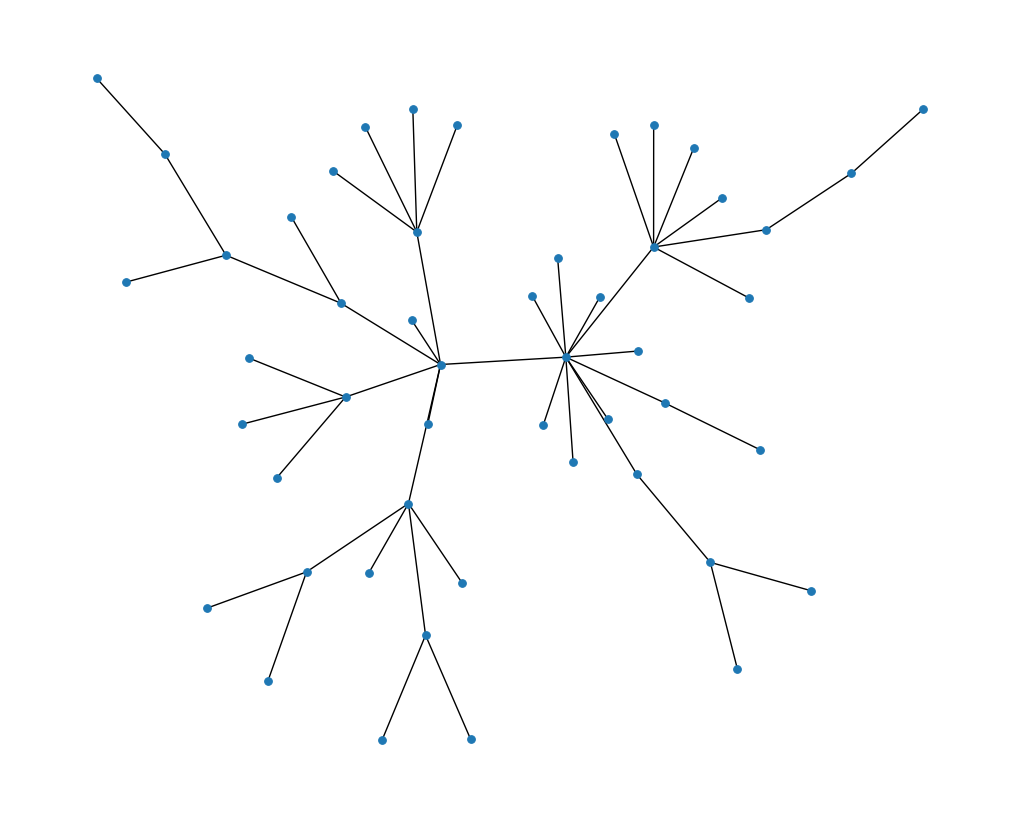

In [106]:
def vizgraph(G):
    plt.figure(figsize=(10, 8), dpi = 100)
    pos = nx.kamada_kawai_layout(G) 
    nx.draw(
        G, pos, with_labels=False, node_size=30
    ) 

    plt.show()
    
    
vizgraph(graph)

In [107]:
clustering_coefficients = nx.clustering(graph)

if isinstance(clustering_coefficients, dict):
# Convert the clustering coefficients dictionary into a DataFrame
    df = pd.DataFrame(list(clustering_coefficients.items()), columns=['Node', 'Clustering Coefficient'])
    display(df.head(20))




,Node,Clustering Coefficient
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


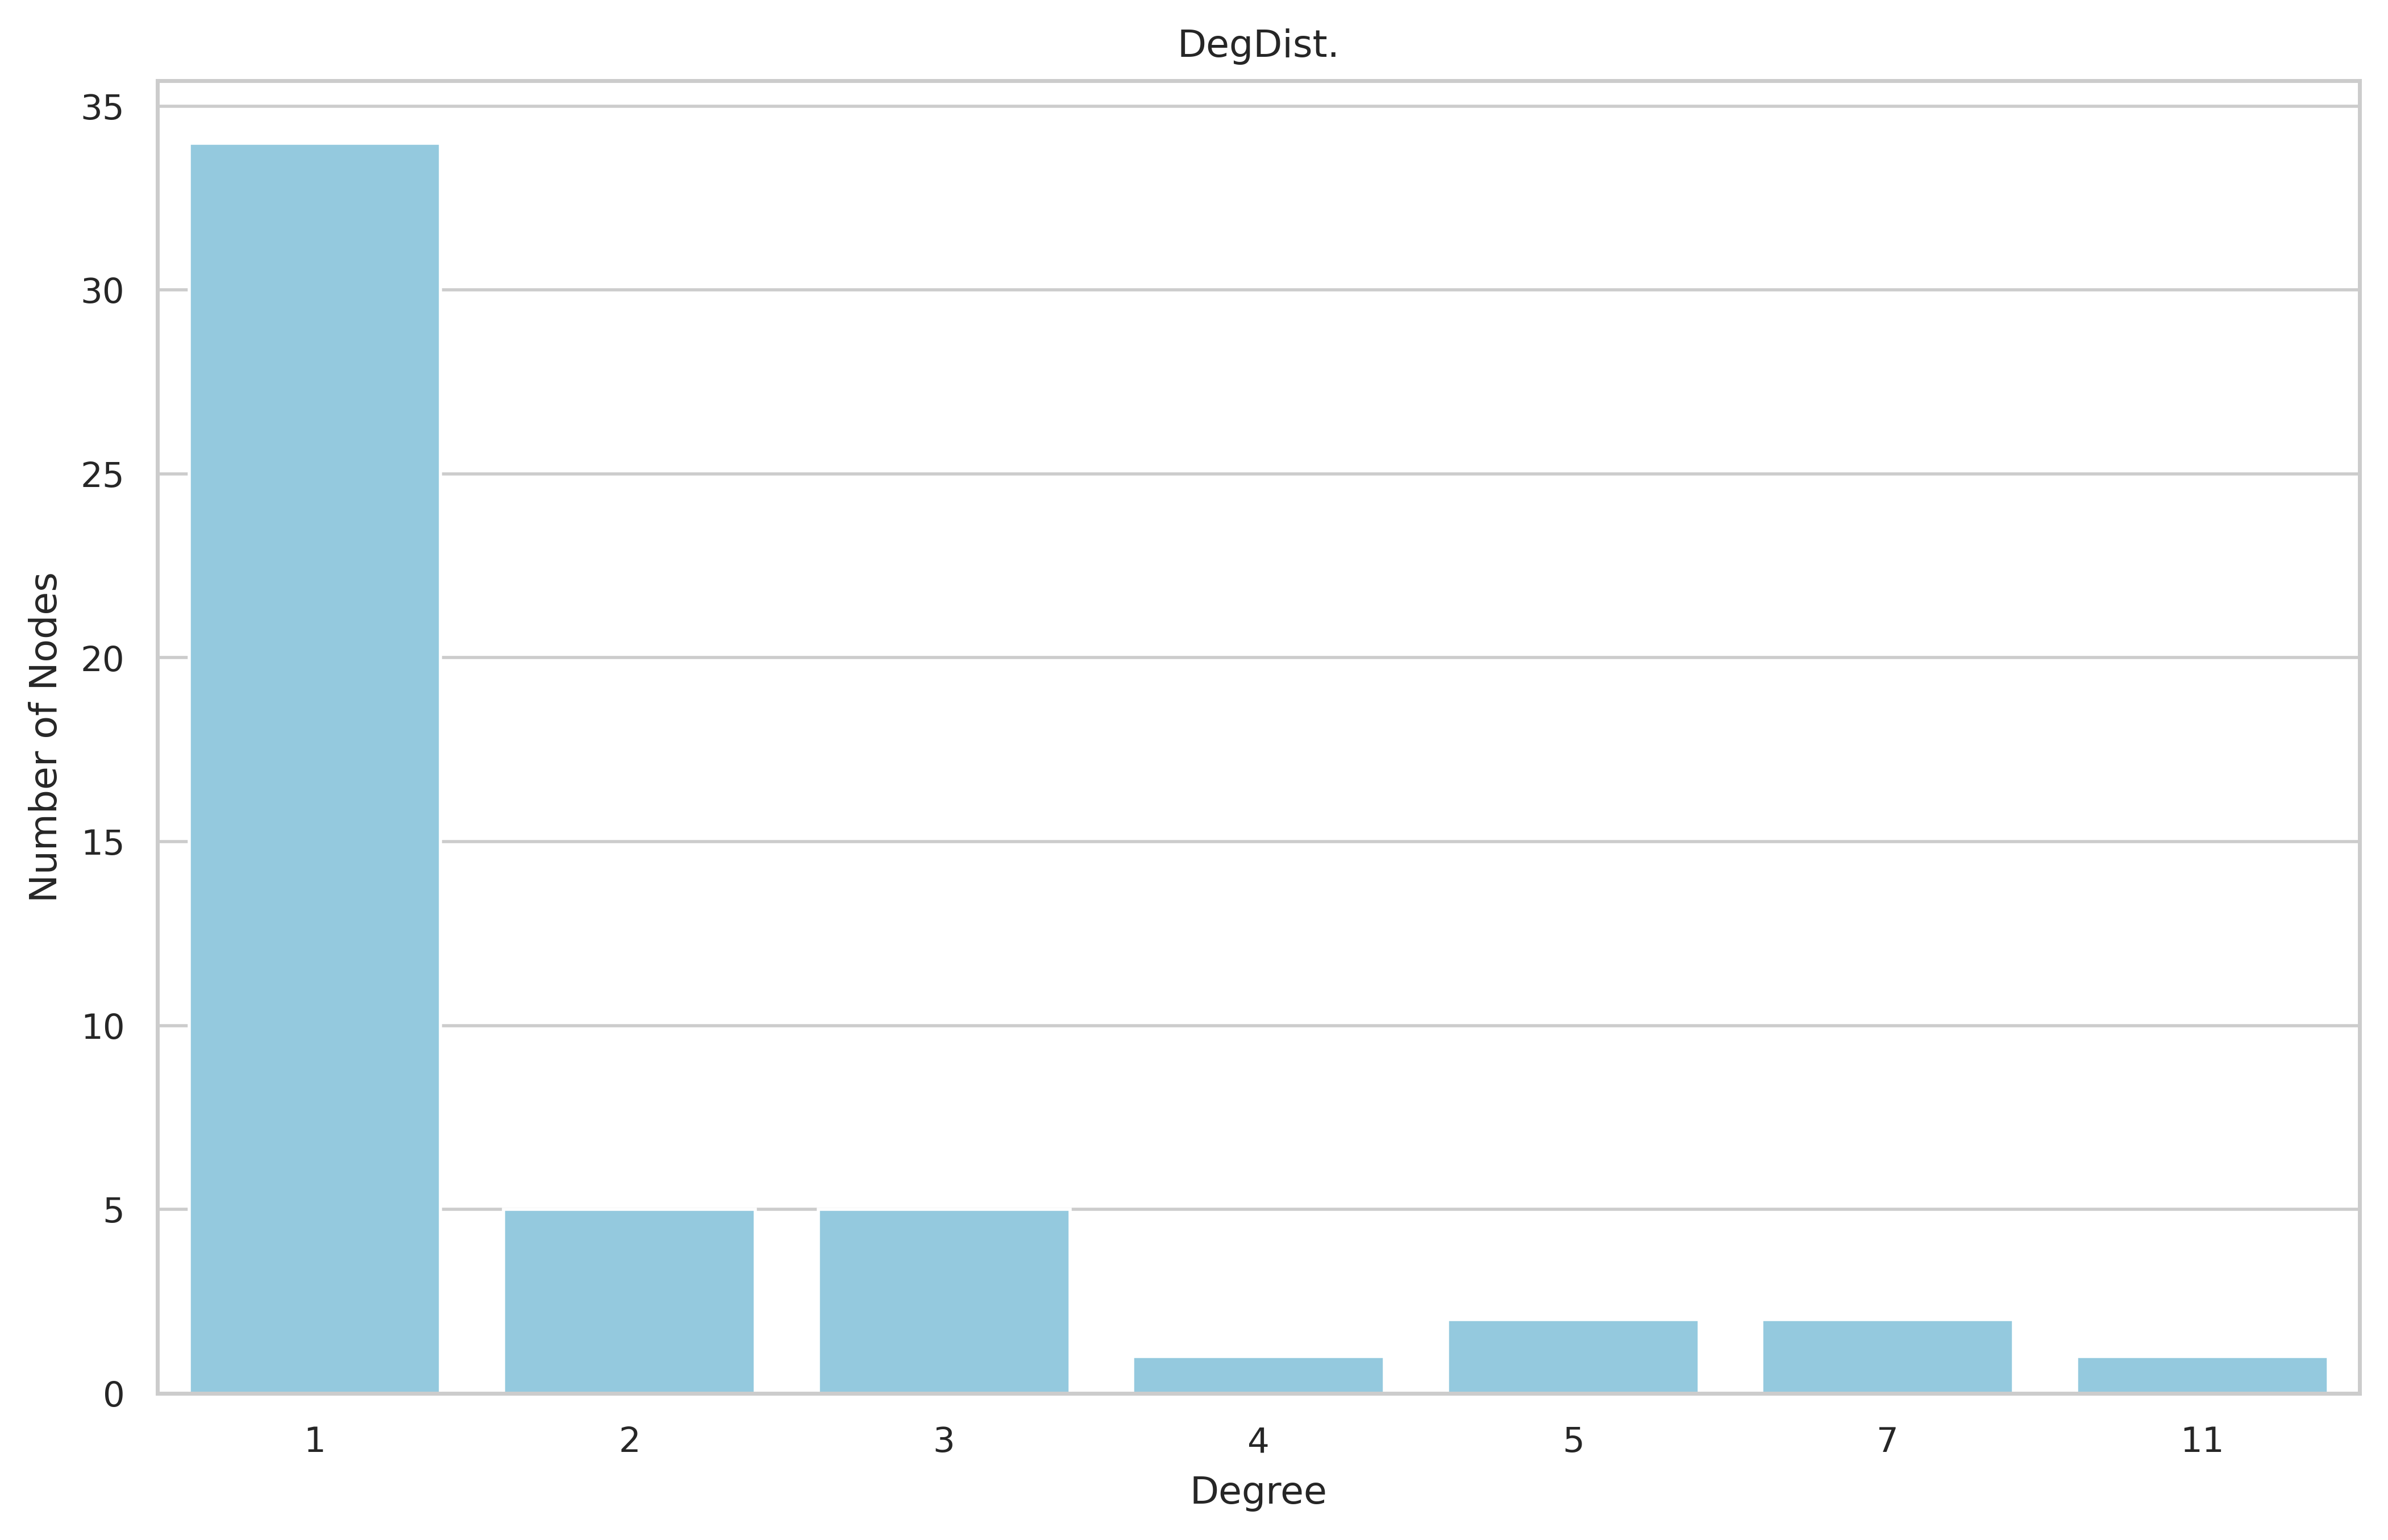

In [108]:
degrees = [graph.degree(n) for n in graph.nodes()]
degree_count = {degree: degrees.count(degree) for degree in set(degrees)}


degrees_list = list(degree_count.keys())
count_list = list(degree_count.values())

plt.figure(figsize=(10, 6), dpi=500)
sns.barplot(x=degrees_list, y=count_list, color='skyblue')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('DegDist.')
plt.show()

In [109]:
bwcenterality = nx.betweenness_centrality(graph)
if isinstance(bwcenterality, dict):
# Convert the clustering coefficients dictionary into a DataFrame
    df = pd.DataFrame(list(bwcenterality.items()), columns=['Node', 'BW centerality'])
    display(df.head(20))


,Node,BW centerality
0,0,0.079932
1,1,0.300170
2,2,0.664966
3,3,0.727891
4,4,0.190476
5,5,0.000000
6,6,0.040816
7,7,0.000000
8,8,0.158163
9,9,0.000000


In [110]:
eigenValueCentrality = nx.eigenvector_centrality(graph)
if isinstance(eigenValueCentrality, dict):
# Convert the clustering coefficients dictionary into a DataFrame
    df = pd.DataFrame(list(eigenValueCentrality.items()), columns=['Node', 'Eigenvalue centerality'])
    display(df.head(20))


,Node,Eigenvalue centerality
0,0,0.090099
1,1,0.301669
2,2,0.595621
3,3,0.369363
4,4,0.121298
5,5,0.082765
6,6,0.176716
7,7,0.163414
8,8,0.145001
9,9,0.101340


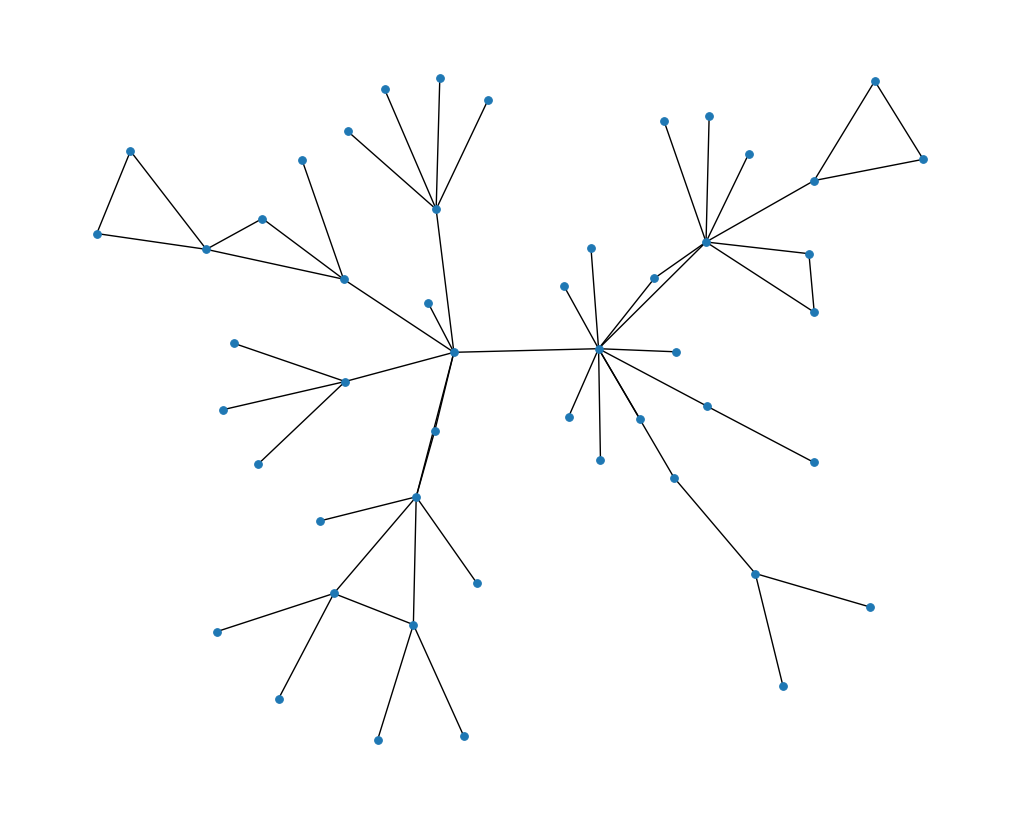

In [112]:
def random_node_pairs(graph, num_pairs):
    node_pairs = []
    nodes = list(graph.nodes())
    for _ in range(num_pairs):
        node1, node2 = random.sample(nodes, 2)
        node_pairs.append((node1, node2))
    return node_pairs


def modify_graph(graph, predicted_links):
    modified_graph = graph.copy()
    modified_graph.add_edges_from(predicted_links)
    return modified_graph

def predict_links(graph, node_pairs):
    predicted_links = []
    for node1, node2 in node_pairs:
        if not graph.has_edge(node1, node2):
            jaccard_coefficient = nx.jaccard_coefficient(graph, [(node1, node2)])
            for u, v, p in jaccard_coefficient:
                if p > 0.1:  # threshold
                    predicted_links.append((node1, node2))
    return predicted_links

    
    
num_pairs = 50
node_pairs = random_node_pairs(graph, num_pairs)

predicted_links = predict_links(graph, node_pairs)

modified_G = modify_graph(graph, predicted_links)

vizgraph(modified_G)
